### SU(3) Wilson gauge theory phase prediction

In [1]:
from pathlib import Path

directory_path = Path('ML_plp')

data = [['beta','real','imag','norm','temp']]
# Iterate through files in the directory
for file_path in directory_path.iterdir():
    if file_path.is_file():
        beta = float(file_path.name[11:])
        temp = 0
        if beta>= 5.692:
            temp = 1
        with open(file_path, 'r') as file:
            lines = file.readlines()
            for line in lines:    
                if 'PLP_n_PLQ' in line:
                    real = float(line.split()[1])
                    imag = float(line.split()[2])
                    norm = (real**2 + imag**2)**0.5
                    data.append([beta,real,imag,norm,temp])

In [2]:
#convert your array into a dataframe
import pandas as pd
df = pd.DataFrame(data)
df.columns = ['beta','real','imag','norm','temp']
# convert rows to float
df = df[1:].astype(float)
df.head()

,beta,real,imag,norm,temp
1,5.6,0.025208,0.005945,0.025899,0.0
2,5.6,0.029829,0.005234,0.030285,0.0
3,5.6,0.003547,0.008195,0.008929,0.0
4,5.6,0.005225,0.000432,0.005243,0.0
5,5.6,0.004454,-0.005239,0.006876,0.0


In [3]:
from pycaret.classification import *

In [4]:
experiment = setup(data = df,  target = 'temp', train_size= 0.6, ignore_features=['beta','real','imag'], session_id=123)

,Description,Value
0,Session id,123
1,Target,temp
2,Target type,Binary
3,Original data shape,"(10010, 5)"
4,Transformed data shape,"(10010, 2)"
5,Transformed train set shape,"(6006, 2)"
6,Transformed test set shape,"(4004, 2)"
7,Ignore features,3
8,Numeric features,1
9,Preprocess,True


In [5]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6490
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3720
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0420
svm,SVM - Linear Kernel,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0450
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2130
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0600
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1680
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2470
lightgbm,Light Gradient Boosting Machine,0.9982,1.0000,0.9969,1.0000,0.9985,0.9962,0.9962,0.1340
nb,Naive Bayes,0.9942,1.0000,1.0000,0.9904,0.9952,0.9878,0.9879,0.0400


In [6]:
lr = create_model('lr')
evaluate_model(lr)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:38:20
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

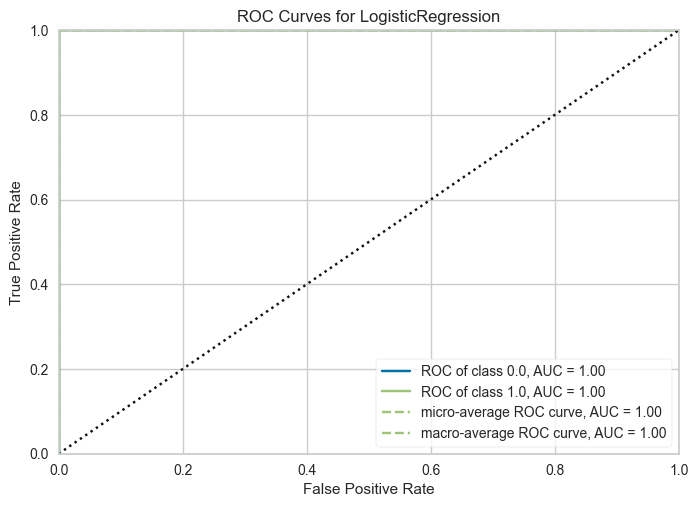

In [7]:
plot_model(lr, plot = 'auc')

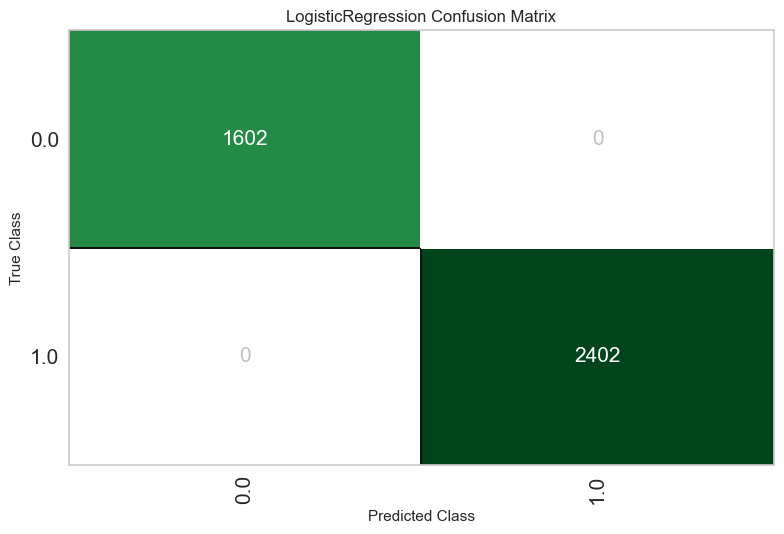

In [8]:
plot_model(lr, plot = 'confusion_matrix')

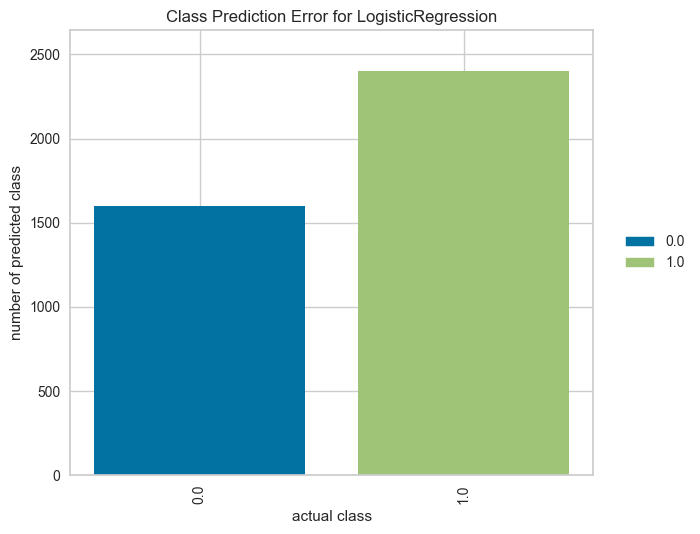

In [9]:
plot_model(lr, plot = 'error')

In [10]:
pred_holdout = predict_model(lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [11]:
pred_holdout

,norm,temp,prediction_label,prediction_score
1555,0.017228,0.0,0,0.9846
1881,0.026145,0.0,0,0.9816
2621,0.018763,0.0,0,0.9842
7801,0.597664,1.0,1,0.9996
106,0.004997,0.0,0,0.9880
...,...,...,...,...
8291,0.642227,1.0,1,0.9998
9957,0.695244,1.0,1,0.9999
5917,0.370510,1.0,1,0.9573
4584,0.304694,1.0,1,0.8526


In [12]:
# copy data and drop Class variable

new_data = df.copy()
new_data.drop('temp', axis=1, inplace=True)
new_data.head()

,beta,real,imag,norm
1,5.6,0.025208,0.005945,0.025899
2,5.6,0.029829,0.005234,0.030285
3,5.6,0.003547,0.008195,0.008929
4,5.6,0.005225,0.000432,0.005243
5,5.6,0.004454,-0.005239,0.006876


In [13]:
# predict model on new_data
predictions = predict_model(lr, data = new_data)
predictions.head()

,beta,real,imag,norm,prediction_label,prediction_score
1,5.6,0.025208,0.005945,0.025899,0,0.9817
2,5.6,0.029829,0.005234,0.030285,0,0.9800
3,5.6,0.003547,0.008195,0.008929,0,0.9870
4,5.6,0.005225,0.000432,0.005243,0,0.9880
5,5.6,0.004454,-0.005239,0.006876,0,0.9875


Text(0, 0.5, 'predicted phase')

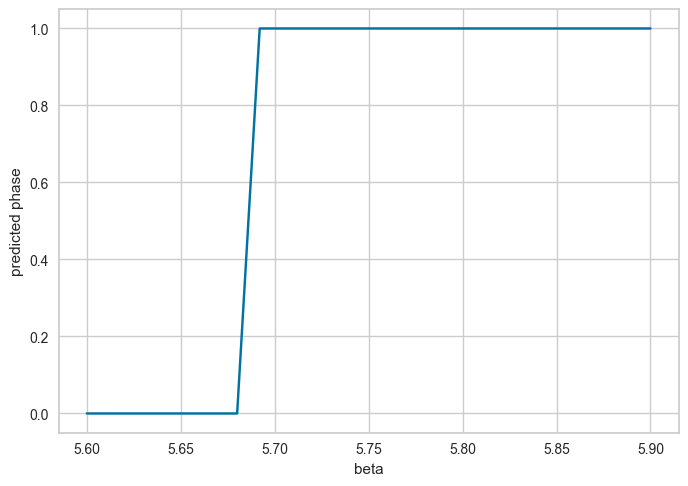

In [14]:
import matplotlib.pyplot as plt
plt.plot(predictions['beta'], predictions['prediction_label'])
plt.xlabel('beta')
plt.ylabel('predicted phase')

### Ising Model